In [1]:
import pandas as pd

In [2]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
pay=pd.read_csv('data/서울시 상권분석서비스(소득소비-행정동).csv', encoding='cp949')

In [4]:
# null값 확인
pd.DataFrame(pay).isnull().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64

In [5]:
# 2022년도 내용추출
pay.set_index('기준_년분기_코드',inplace=True)
pay1 = pay.loc[[20221,20222,20223,20224]]
pay1.tail(3)

,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
기준_년분기_코드,,,,,,,,,,,,,,,
20224,11710647,위례동,4202887,8,4953932000,929585000,63524000,7286000,543822000,1228796000,662566000,29008000,196900000,195254000,1097191000
20224,11740600,천호1동,2473111,6,2965499000,766647000,109813000,71949000,475302000,56654000,218323000,48717000,411595000,142343000,664156000
20224,11740660,성내3동,2897346,6,7115757000,1704023000,216698000,98728000,933545000,426794000,242356000,178853000,417384000,230889000,2666487000


In [6]:
pay1.reset_index(drop=False,inplace=True)
pay1.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20221,11110550,부암동,3647449,7,1150156000,197255000,24368000,3055000,110729000,91012000,80958000,545000,73066000,10146000,559022000
1,20221,11140520,소공동,5380521,9,1677876423000,1132375000,33677000,494818000,1313364000,611243000,93140000,109906000,1661962297000,9509851000,2615752000
2,20221,11140645,청구동,3566241,7,1307141000,388708000,107456000,47942000,85661000,3797000,125290000,15328000,46020000,126199000,360740000


In [7]:
# 동별 1년치로 합산
group_pay = pay1.drop('행정동_코드_명', axis=1).groupby(pay1['행정동_코드_명']).sum()
group_pay.drop(['기준_년분기_코드','행정동_코드','소득_구간_코드',],axis=1, inplace=True)

In [8]:
# 월 평균 -> 연평균으로
group_pay['연_평균_소득_금액'] = group_pay['월_평균_소득_금액'] * 12

In [9]:
group_pay.drop('월_평균_소득_금액', axis=1, inplace=True)
group_pay

,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액,연_평균_소득_금액
행정동_코드_명,,,,,,,,,,,,
가락1동,21782359000,12769464000,178608000,750977000,2721802000,30615000,511773000,112837000,754575000,1588887000,2362821000,238732224
가락2동,24216912000,6257011000,165364000,269734000,4994096000,1651932000,1943509000,458950000,1095690000,1237813000,6142813000,187689504
가락본동,32642364000,4874817000,1267970000,358742000,6298319000,1375252000,578296000,1837429000,3496882000,1097982000,11456675000,169034928
가리봉동,4348312000,1206690000,47721000,103174000,657895000,113633000,30314000,392714000,275687000,94922000,1425562000,112143888
가산동,144514597000,17079298000,63187251000,1800485000,13161666000,2539432000,1387750000,1981816000,16524570000,3868806000,22983523000,123244512
...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,3896373000,1701686000,14133000,41335000,743531000,45411000,269266000,0,298117000,84131000,698763000,169113648
후암동,8010255000,3132859000,145879000,119858000,329404000,197713000,280990000,123133000,587219000,208887000,2884313000,144656496
휘경1동,13429541000,4679926000,75172000,919676000,1599267000,244942000,310261000,234087000,853488000,1049639000,3463083000,130693152


In [10]:
# 이상한 이름 변경
group_pay.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'},inplace=True)

In [11]:
group_pay.loc['종로1.2.3.4가동']

지출_총금액          831733101000
식료품_지출_총금액       17670804000
의류_신발_지출_총금액     11230262000
생활용품_지출_총금액       4297694000
의료비_지출_총금액       25759541000
교통_지출_총금액        11018778000
교육_지출_총금액         5842827000
유흥_지출_총금액         9529347000
여가_문화_지출_총금액    542666906000
기타_지출_총금액       137611120000
음식_지출_총금액        66105822000
연_평균_소득_금액         155772048
Name: 종로1.2.3.4가동, dtype: int64

In [12]:
# 중복값이 없다.
group_pay['지출_총금액'].value_counts()

지출_총금액
21782359000    1
7564604000     1
10442657000    1
15215764000    1
14438328000    1
              ..
8146417000     1
33439991000    1
68285279000    1
22617139000    1
38076898000    1
Name: count, Length: 424, dtype: int64

In [13]:
group_pay.columns
# columns별 TOP10뽑기
columns = list(group_pay.columns)
columns

['지출_총금액',
 '식료품_지출_총금액',
 '의류_신발_지출_총금액',
 '생활용품_지출_총금액',
 '의료비_지출_총금액',
 '교통_지출_총금액',
 '교육_지출_총금액',
 '유흥_지출_총금액',
 '여가_문화_지출_총금액',
 '기타_지출_총금액',
 '음식_지출_총금액',
 '연_평균_소득_금액']

In [14]:
col=[]
for i in columns:
    col.append(group_pay[i].nlargest(10))
col

[행정동_코드_명
 소공동            6479963398000
 역삼1동           4971754284000
 구로3동           4882112976000
 아현동            3433884595000
 역삼2동           3151369658000
 회현동            2260397987000
 종로1.2.3.4가동     831733101000
 서초3동            726274281000
 서초2동            725418705000
 여의동             608569569000
 Name: 지출_총금액, dtype: int64,
 행정동_코드_명
 용산2가동     454662460000
 회현동       104654032000
 역삼1동       29627718000
 서교동        26787852000
 중계2?3동     26561148000
 구로5동       25203219000
 월계3동       23788260000
 성산2동       19322745000
 여의동        18957864000
 제기동        17859047000
 Name: 식료품_지출_총금액, dtype: int64,
 행정동_코드_명
 가산동     63187251000
 삼성1동    35272732000
 대치2동    31158017000
 서교동     22546605000
 청담동     18961169000
 문정2동    18028379000
 광희동     17654096000
 방화2동    14895618000
 역삼1동    12487503000
 압구정동    11695059000
 Name: 의류_신발_지출_총금액, dtype: int64,
 행정동_코드_명
 서초3동           48855282000
 한강로동           47855195000
 명동             15081572000
 역삼1동           13028321000
 

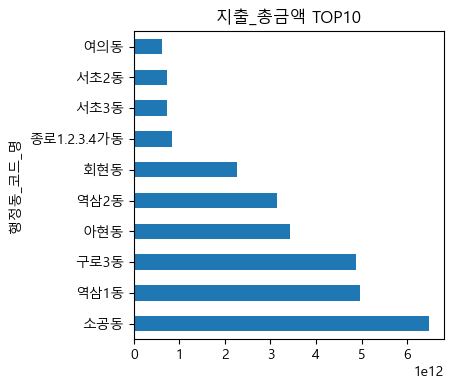

In [15]:
# 지출_총금액 TOP10
col[0].plot.barh(figsize=(4,4), title='지출_총금액 TOP10')
plt.show()

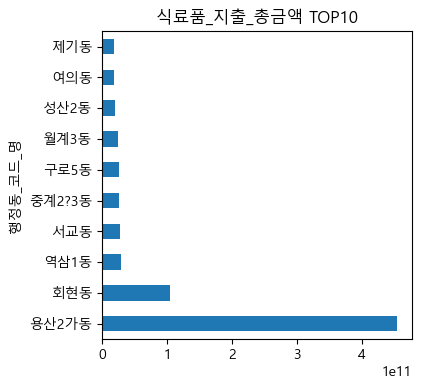

In [16]:
# 식료품_지출_총금액 TOP10
col[1].plot.barh(figsize=(4,4), title='식료품_지출_총금액 TOP10')
plt.show()

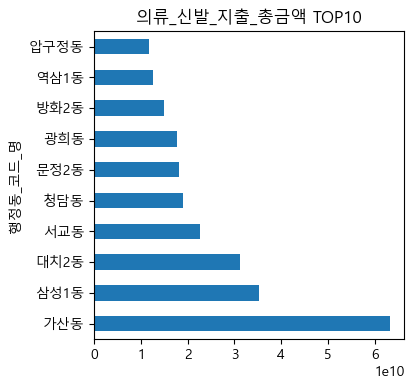

In [17]:
# 의류_신발_지출_총금액 TOP10
col[2].plot.barh(figsize=(4,4), title='의류_신발_지출_총금액 TOP10')
plt.show()

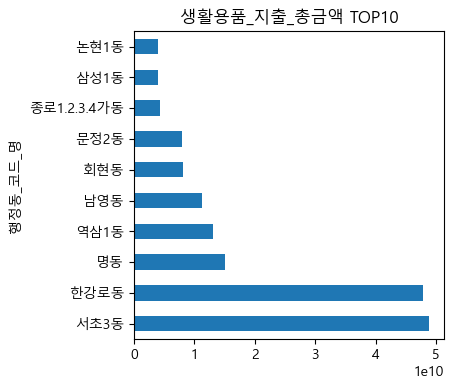

In [18]:
# 생활용품_지출_총금액 TOP10
col[3].plot.barh(figsize=(4,4), title='생활용품_지출_총금액 TOP10')
plt.show()

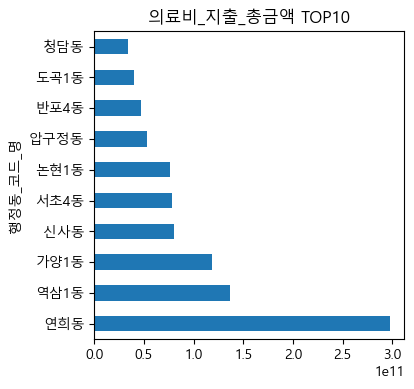

In [19]:
# 의료비_지출_총금액 TOP10
col[4].plot.barh(figsize=(4,4), title='의료비_지출_총금액 TOP10')
plt.show()

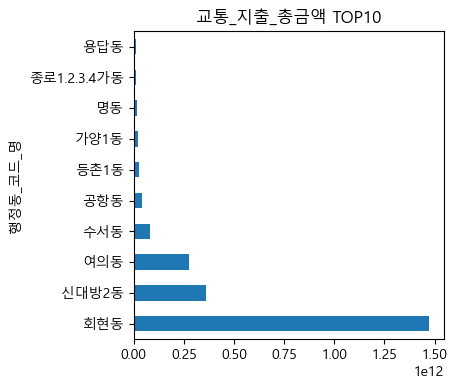

In [20]:
# 교통_지출_총금액 TOP10
col[5].plot.barh(figsize=(4,4), title='교통_지출_총금액 TOP10')
plt.show()

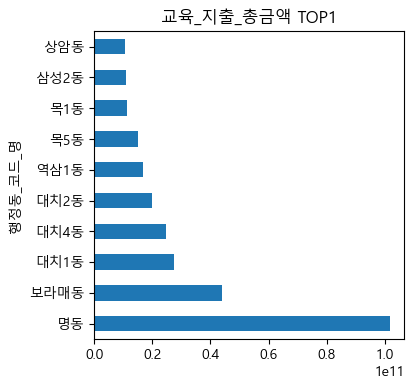

In [21]:
# 교육_지출_총금액 TOP10
col[6].plot.barh(figsize=(4,4), title='교육_지출_총금액 TOP10')
plt.show()

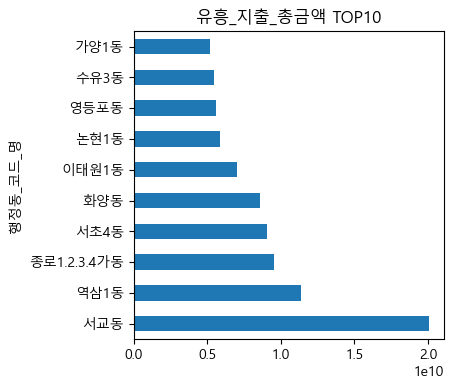

In [22]:
# 유흥_지출_총금액 TOP10
col[7].plot.barh(figsize=(4,4), title='유흥_지출_총금액 TOP10')
plt.show()

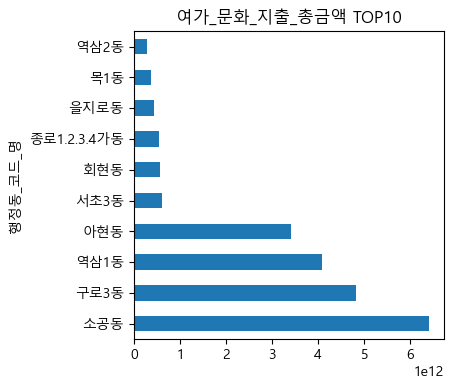

In [23]:
# 여가_문화_지출_총금액 TOP10
col[8].plot.barh(figsize=(4,4), title='여가_문화_지출_총금액 TOP10')
plt.show()

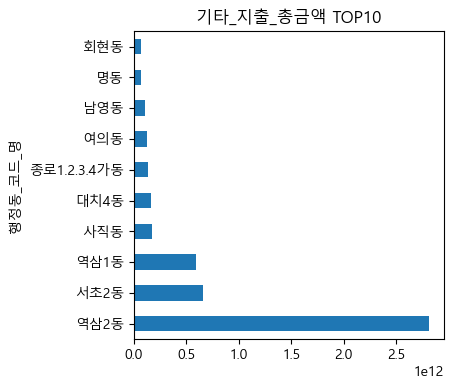

In [24]:
# 기타_지출_총금액 TOP10
col[9].plot.barh(figsize=(4,4), title='기타_지출_총금액 TOP10')
plt.show()

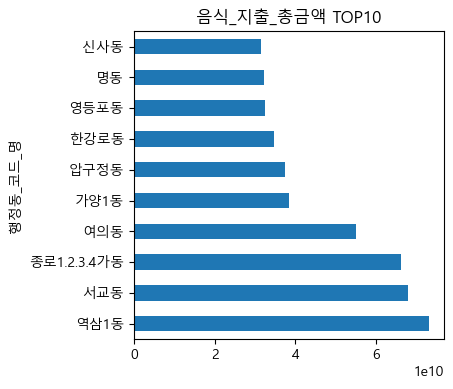

In [25]:
# 음식_지출_총금액 TOP10
col[10].plot.barh(figsize=(4,4), title='음식_지출_총금액 TOP10')
plt.show()

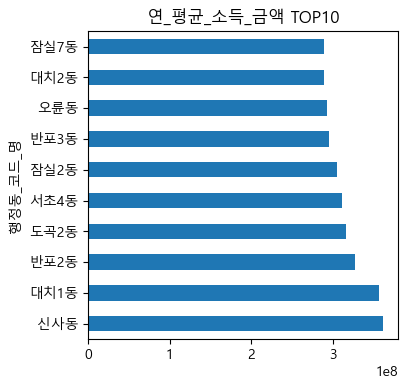

In [26]:
# 연_평균_소득_금액 TOP10
col[11].plot.barh(figsize=(4,4), title='연_평균_소득_금액 TOP10')
plt.show()